#  Notebook Quantum Computing with Qiskit

Qiskit is a Python framework dedicated to quantum computing. It allows to design and simulate quantum programs on classical computers. It offers the possibility to design quantum circuits using quantum gates, but also proposes a collection of algorithms and tools already designed. Quantum programs created with Qiskit can be simulated but also executed on IBM's quantum computers.

Through this notebook, we will see the main features of the Qiskit framework: the creation of quantum circuits, the representation of qubit states, the use of quantum gates, the measurement of qubit states and the implementation of some known quantum algorithms.

## Packages

The following code allows us to import from the Qiskit library all the elements that will allow us to create quantum circuits and to initialize the quantum simulator, as well as adding quantum gates and implementing quantum algorithms.

In [53]:
#!pip install qiskit
#!pip install pylatexenc

In [12]:
import numpy as np
import math 
import matplotlib.pyplot as plotter
from qiskit import QuantumCircuit, Aer, assemble, transpile
from qiskit.visualization import plot_histogram, plot_bloch_multivector, plot_bloch_vector
from qiskit.tools.monitor import job_monitor
#from qiskit_textbook.tools import vector2latex

## Quantum circuit and Qubits

_A quantum circuit is a conceptual framework used in quantum information theory to describe quantum computation, analogous to classical circuits. It involves a series of operations including quantum gates, qubit initializations, measurements, and potentially other actions, that are performed in sequence._

In Qiskit, we use the `QuantumCircuit` object to store circuits. This object represents the list of quantum operations on our circuit and to which qubits they apply. The `QuantumCircuit(q,c)` function allows us to create circuits and takes as parameters the number of qubits used by our circuit and the number of classical bits.

We have seen that the state of a single qubit can be described by a two-dimensional column vector of unit norm. This also applies to Qiskit and the state of the qubits, although starting as $|0\rangle$, can be initialized using the `inititialize(state, qubit)` function which transform them into any state by specifying the target qubit and a vector describing the desired state.

To create a quantum circuit, visualizing it can be very useful. For that, You can either call print() on the circuit, or call the draw() method on the object. Here's some examples :

#### Example 1 : single qubit

In [13]:
# Build a quantum circuit
qc = QuantumCircuit(1) # A Quantum circuit with one qubit
qc.h(0)

In [14]:
print(qc)

   ┌───┐
q: ┤ H ├
   └───┘


In [15]:
qc.draw()

┌───┐
q: ┤ H ├
   └───┘

For better visualization of circuits, 'mpl' from matplotlib can be added. This also requires installing the package "pylatexenc".

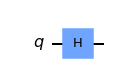

In [16]:
qc.draw(output='mpl')

#### Example 2 : multi-qubit

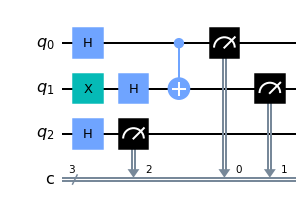

In [17]:
# Build another quantum circuit
circuit = QuantumCircuit(3, 3) # A Quantum circuit with 3 qubits and 3 classical bits

circuit.x(1)  
circuit.h(range(3))
circuit.cx(0, 1)
circuit.measure(range(3), range(3));
circuit.draw(output='mpl')

### Initialize the state of the qubit

We have seen that the state of a single qubit can be described by a two-dimensional column vector of unit norm. This also applies to Qiskit and the state of the qubits, although starting as |0⟩, can be initialized using the inititialize(state, qubit) function which transform them into any state by specifying the target qubit and a vector describing the desired state.

Below is an example in which we create a 2 qubit quantum circuit and initialize the first qubit as |q0⟩=|1⟩ and second qubit as |q1⟩= $\frac{1}{2}×|0⟩ + \frac{\sqrt{3}}{2}×|1⟩$

#### Example 3

In [18]:
# Creates a quantum circuit (2 qubits)
qc2 = QuantumCircuit(2)
# Apply initialisation operation
qc2.initialize([0, 1], 0)
qc2.initialize([1/2, math.sqrt(3)/2], 1)

## Some concepts about qubits

### Bloch Sphere

One of the most common representations of a qubit is the Bloch sphere. It allows to visually describe the state of a qubit (a complex two-dimensional vector). 

Qiskit has a function to plot a Bloch sphere, plot_bloch_vector(). This function accepts cartesian coordinates by default, but can also accept spherical coordinates by passing the argument coord_type='spherical'.

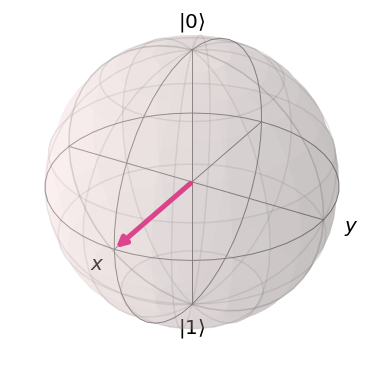

In [19]:
coords = [1,math.pi/2,0]  # [Radius, Theta, Phi]
plot_bloch_vector(coords, coord_type='spherical')

We have plotted a qubit in the state $|+\rangle$. In this case, $ \theta = \frac{\pi}{2}$ and $\phi$=0.

### Measurement of a qubit

A measurement corresponds to the informal idea of ”observation” of the qubit, which immediately reduces the quantum state to one of the two classical states $[1, 0]$ and $[0, 1]$. When a qubit given by the quantum state vector $[\alpha, \beta]$ is measured, we obtain the result $0$ with probability $|\alpha|^2$ and the result 1 with probability $|\beta|^2$.

The act of measuring qubits _changes_ the state of our qubits. We sometimes refer to this as _collapsing_ the state of the qubit: depending of the measure result, the new state of the qubit is $|0\rangle$ or $|1\rangle$. Thus, we often measure the state of the qubits at the end of the execution of a quantum program.

Qiskit allows to easily measure the state of all the qubits of a circuit with the "measure all" function. It is then possible to plot the results.

Below is an example of measuring the state of the qubits on the previous circuit. The first qubit is always measured as $|1\rangle$ since it was initialized that way, and we should obtain those results for the second qubit:

\begin{gather*}
    p_{01} = |\frac{1}{2}|^2 = 0.25\\
    p_{11} = |\frac{\sqrt{3}}{2}|^2 = 0.75
\end{gather*}

Let's apply the measurement by taking the $\textbf{Example 3}$ :

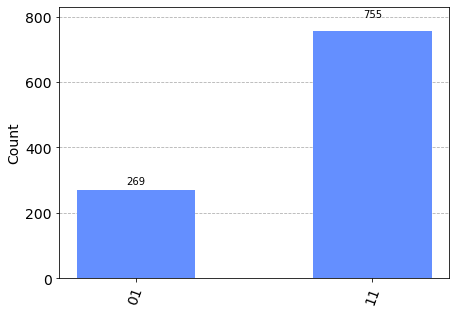

In [20]:
# Creates a quantum circuit (2 qubits)
qc2 = QuantumCircuit(2)
# Apply initialisation operation
qc2.initialize([0, 1], 0)
qc2.initialize([1/2, math.sqrt(3)/2], 1)

# Add measurements to all qubits
qc2.measure_all()
# Plot results
qobj2 = assemble(qc2)
counts2 = sim.run(qobj2).result().get_counts()
plot_histogram(counts2)

Measurements with Qiskit are made on the Z-basis, where we obtain the probabiblity of measurements of states made of linear combinations of $|0\rangle$ and $|1\rangle$. We will see later that the measurements can be made on other basis thanks to quantum gates.

###  Getting the final state vector

We can use one of Qiskit’s simulators to view the resulting state of our qubit.
We will apply it to the $\textbf{Example 1}$.

In [21]:
qc = QuantumCircuit(1) # A Quantum circuit with one qubit
qc.h(0)

sim = Aer.get_backend('aer_simulator') # Tell Qiskit how to simulate our circuit
qc.save_statevector() # Save initial state
qobj = assemble(qc) # Create a Qobj from the circuit for the simulator to run
final_state = sim.run(qobj).result().get_statevector()

#print(final_state)
from qiskit.visualization import array_to_latex
array_to_latex(final_state, prefix="\\text{Statevector} = ")

<IPython.core.display.Latex object>

This time, instead of the statevector we will get the counts for the 0 and 1 results using .get_counts():

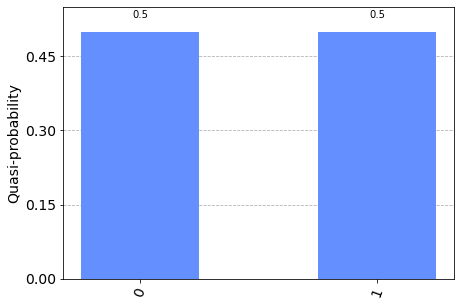

In [22]:
qobj = assemble(qc)
result = sim.run(qobj).result()
counts = result.get_counts()
plot_histogram(counts)

We can see we have equal probability of measuring either |0⟩ or |1⟩ which is our expected result because after applying the H gate, the qubit is in a superposition of both the "0" and "1" basis states with equal probabilities.

### Getting the unitary matrix

It may not be clear how an X-gate would act on a qubit in a multi-qubit vector. Fortunately, the rule is quite simple : just as we used the kronecker product to calculate multi-qubit statevectors, we use the tensor product to calculate matrices that act on these statevectors. For example, in the circuit below :

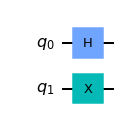

In [23]:
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
qc.draw('mpl')

we can represent the simultaneous operations (H & X) using their kronecker product:

X$|q1\rangle$ ⊗ H$|q0\rangle$ = (X⊗H) $|q1q0\rangle$

Instead of calculating this by hand, we can use Qiskit’s aer_simulator to calculate this for us. The Aer simulator multiplies all the gates in our circuit together to compile a single unitary matrix that performs the whole quantum circuit:

In [24]:
usim = Aer.get_backend('aer_simulator')
qc.save_unitary()
qobj = assemble(qc)
unitary = usim.run(qobj).result().get_unitary()
array_to_latex(unitary, prefix="\\text{Circuit = }\n")

<IPython.core.display.Latex object>

As you increase the number of qubits in your circuit, the size of the unitary matrix will increase exponentially.

### Multiple Qubits and Entanglement

Single qubits are interesting, but individually they offer no computational advantage. In the first part on circuit creation, we saw that it was possible to specify the number of qubits we wanted for our circuit. The advantages of quantum computing lie in the fact that several qubits can be used and that they can interact with each other. These interactions between qubits are performed with multiple qubit quantum gates or controlled quantum gates. We will see later how to add these gates to our circuit. In the meantime, it is important to remember how multiple qubit circuits work. The state of a single qubit has two complex amplitudes and can be expressed as a linear combination of $|0\rangle$ and $|1\rangle$. In the same way, the state of 2 qubits will be described by 4 complex amplitudes:
\begin{equation*}
    |a\rangle = a_{00}|00\rangle + a_{01}|01\rangle + a_{10}|10\rangle + a_{11}|11\rangle = [a_{00}, a_{01}, a_{10}, a_{11}]
\end{equation*}
Remember that the state measurement rules for qubits are similar with multiple qubits and that:
\begin{gather*}
    p(|00\rangle) = |a_{00}|^2\\
    |a_{00}|^2 + |a_{01}|^2 + |a_{10}|^2 + |a_{11}|^2 = 1
\end{gather*}

Some states, called **entangled**, are special and have interesting properties. Let's take for example the state $\frac{1}{2}(|00\rangle + |11\rangle)$ for a 2-qubit circuit. This state is known as the _bell state_ and can only be measured as $|00\rangle$ or $|11\rangle$ although the state of two qubits is described by 4 basis states. A characteristic of this state is that it cannot be measured as $|01\rangle$ or $|10\rangle$. Therefore, if we measured the top qubit and got the state $|1\rangle$,  the collective state of our qubits changes like so: $\frac{1}{2}(|00\rangle + |11\rangle) \to |11\rangle$.

In the following example, we will see the measurement result of this state:

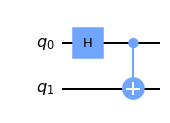

In [25]:
qc = QuantumCircuit(2)
# Apply H-gate to the first:
qc.h(0)
# Apply a CNOT:
qc.cx(0, 1)
qc.draw('mpl')


In [26]:
# Let's get the result:
qc.save_statevector()
qobj = assemble(qc)
result = sim.run(qobj).result()
final_state = result.get_statevector()
array_to_latex(final_state, prefix="\\text{Statevector = }")

<IPython.core.display.Latex object>

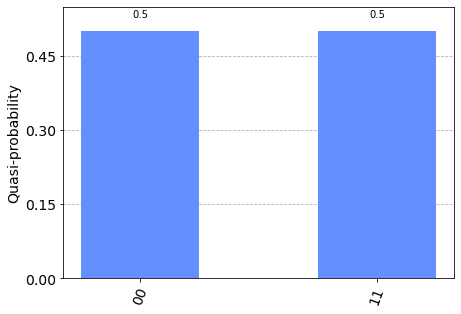

In [27]:
plot_histogram(result.get_counts())

It may not be immediately apparent how Qiskit computes the Bloch vectors for entangled qubits, given our earlier definition of the Bloch sphere. In the case of a single qubit, the location of the Bloch vector along an axis corresponds to the expected measurement outcome in that particular basis. By extending this approach to Bloch vector visualization for entangled qubits, we reach the conclusion that there is no single-qubit measurement basis that can guarantee a specific measurement outcome. This is in contrast to single-qubit states where we can always select a single-qubit basis. However, examining the qubits individually in this way ignores the crucial impact of the correlation between the qubits, making it impossible to differentiate between different entangled states.
Therefore, the states $\frac{1}{2}(|00\rangle + |11\rangle)$ and $\frac{1}{2}(|01\rangle + |10\rangle)$ will both look the same on these separate Bloch spheres, despite being very different states with different measurement outcomes.

The state we worked on previously cannot be written as two separate qubit states, this means we lose information when we try to plot our state on separate Bloch spheres.

## Quantum Gates

### Hadamard Gate
The Hadamard (H-gate) is a fundamental quantum gate which operates on a single qubit. It maps the basis states $|0\rangle \mapsto \frac{|0\rangle + |1\rangle}{\sqrt{2}}$ and $|1\rangle \mapsto \frac{|0\rangle - |1\rangle}{\sqrt{2}}$.

Its use in Qiskit requires the function `h()`. 

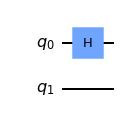

In [40]:
qc = QuantumCircuit(2)
# Apply H-gate to the first:
qc.h(0)
qc.draw('mpl')

In [41]:
# Let's see the result:
sim = Aer.get_backend('aer_simulator')
qc.save_statevector()
qobj = assemble(qc)
final_state = sim.run(qobj).result().get_statevector()
# Print the statevector neatly:
array_to_latex(final_state, prefix="\\text{Statevector = }")

<IPython.core.display.Latex object>

Let's see below the result of the transformation made by the H-gate on the qubit 0 :

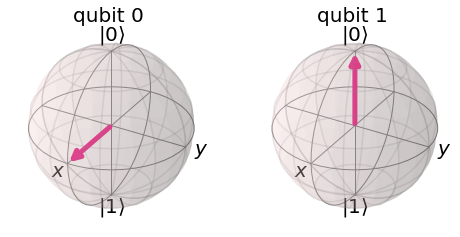

In [37]:
plot_bloch_multivector(final_state)

Here's another visualisation of the Bloch sphere to see the final state of the vector :

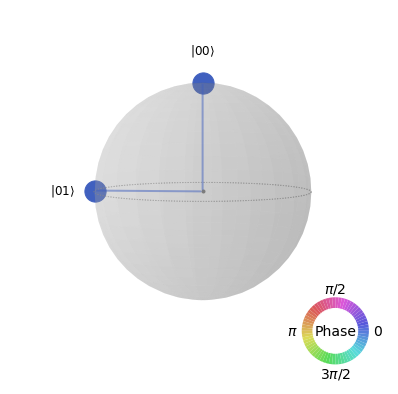

In [38]:
from qiskit.visualization import plot_state_qsphere
plot_state_qsphere(final_state)

### The Pauli Gates (X,Y,Z)

#### The X-Gate

The Pauli $(X, Y, Z)$ gates are gates that act on a single qubit. The Pauli X, Y and Z equate, respectively, to a rotation around the x, y and z axes of the Bloch sphere by $\pi$ radians. The Pauli-X gate is the quantum equivalent of the NOT gate for classical computers. It maps $|0\rangle$ to $|1\rangle$ and $|1\rangle$ to $|0\rangle$. The Pauli-Y gate maps $|0\rangle$ to $i|1\rangle$ and $|1\rangle$ to $-i|0\rangle$. Pauli-Z leaves the basis state $|0\rangle$ unchanged and maps $|1\rangle$ to $-|1\rangle$.

Each of the Pauli gates (X, Y, Z) can be used in the quantum circuits created with Qiskit. They can be easily added to a circuit using the `x()`, `y()`, and  `z()` functions and specifying the target qubit as a parameter.

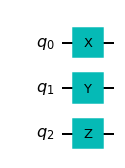

In [42]:
# The Pauli gates (X, Y, Z)
qc = QuantumCircuit(3)
qc.x(0)
qc.y(1)
qc.z(2)
qc.draw(output='mpl')

Let's see the result of the above circuit.

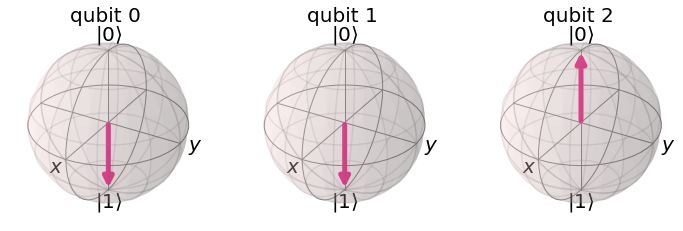

In [43]:
qc.save_statevector()
qobj = assemble(qc)
state = sim.run(qobj).result().get_statevector()
plot_bloch_multivector(state)

### CNOT Gate

CNOT (or Conditional NOT, controlled Pauli-X) is a really important operation which operates on a pair of bits. One bit is designated to be the ”control” bit and the other one is the ”target” bit. It performs the NOT operation on the second qubit only when the first qubit is $|1\rangle$, and otherwise leaves it unchanged.

The CNOT gate can be described as the gate that maps the basis states $|{a, b}\rangle \mapsto |{a, a \oplus b}\rangle$ where $\oplus$ is XOR.

Below is an example in Qiskit where $0$ is the control bit and $1$ is the target bit.

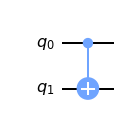

In [44]:
qc = QuantumCircuit(2)

# Apply CNOT
qc.cx(0,1)
qc.draw('mpl')

### Parametrised gates

Qiskit also allows us to use parametrised gates such as the gate: `p(phi, qubit)`, which performs a rotation of $\varphi$ radians around the Z-axis direction. This gate is known as the phase shift, which is part of the single-qubit gates. It maps the basis states $|0\rangle \mapsto |0\rangle$ and $|1\rangle \mapsto e^{i\varphi}|1\rangle$.



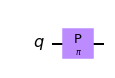

In [46]:
qc = QuantumCircuit(1)
qc.p(math.pi, 0)
qc.draw(output='mpl')

## Some Quantum Algorithms

### Quantum phase estimation
Quantum phase estimation is one of the most important subroutines in quantum computation. It serves as a central building block for many quantum algorithms. The objective of the algorithm is the following:

Given a unitary operator U, the algorithm estimates $\theta$ in U $|\psi\rangle$ = $e^{2\pi i \theta}|\psi\rangle$. Here $|\psi\rangle$ is an eigenvector and $e^{2\pi i \theta}$ is the corresponding eigenvalue. Since U is unitary, all of its eigenvalues have a norm of 1.

Let's see an example of an application of the quantum phase estimation :

#### Estimating Pi Using Quantum Phase Estimation Algorithm

In [15]:
# The function qft_dagger computes the inverse Quantum Fourier Transform.
def qft_dagger(circ_, n_qubits):
    """n-qubit QFTdagger the first n qubits in circ"""
    for qubit in range(int(n_qubits/2)):
        circ_.swap(qubit, n_qubits-qubit-1)
    for j in range(0,n_qubits):
        for m in range(j):
            circ_.cp(-math.pi/float(2**(j-m)), m, j)
        circ_.h(j)
        
# The function qpe_pre prepares the initial state for the estimation. 
# Note that the starting state is created by applying a Hadamard gate on the all but the last qubit, and setting the last qubit to |1⟩.
def qpe_pre(circ_, n_qubits):
    circ_.h(range(n_qubits))
    circ_.x(n_qubits)

    for x in reversed(range(n_qubits)):
        for _ in range(2**(n_qubits-1-x)):
            circ_.cp(1, n_qubits-1-x, n_qubits)
            
# The function run_job run a quantum circuit and return the results.
def run_job(circ, backend, shots=1000, optimization_level=0):
    t_circ = transpile(circ, backend, optimization_level=optimization_level)
    qobj = assemble(t_circ, shots=shots)
    job = backend.run(qobj)
    job_monitor(job)
    return job.result().get_counts()

simulator = Aer.get_backend('aer_simulator')

In [19]:
# The function get_pi_estimate uses n_qubits to get an estimate for π.
def get_pi_estimate(n_qubits):

    # create the circuit
    circ = QuantumCircuit(n_qubits + 1, n_qubits)
    # create the input state
    qpe_pre(circ, n_qubits)
    # apply a barrier
    circ.barrier()
    # apply the inverse fourier transform
    qft_dagger(circ, n_qubits)
    # apply  a barrier
    circ.barrier()
    # measure all but the last qubits
    circ.measure(range(n_qubits), range(n_qubits))

    # run the job and get the results
    counts = run_job(circ, backend=simulator, shots=10000, optimization_level=0)
    # print(counts) 

    # get the count that occurred most frequently
    max_counts_result = max(counts, key=counts.get)
    max_counts_result = int(max_counts_result, 2)
    
    # solve for pi from the measured counts
    theta = max_counts_result/2**n_qubits
    return (1./(2*theta))

Now, let's run the get_pi_estimate function with different numbers of qubits and print the estimates : 

In [21]:
nqs = list(range(2,12+1))
pi_estimates = []
for nq in nqs:
    thisnq_pi_estimate = get_pi_estimate(nq)
    pi_estimates.append(thisnq_pi_estimate)
    print(f"{nq} qubits, pi ≈ {thisnq_pi_estimate}")

Job Status: job has successfully run
2 qubits, pi ≈ 2.0
Job Status: job has successfully run
3 qubits, pi ≈ 4.0
Job Status: job has successfully run
4 qubits, pi ≈ 2.6666666666666665
Job Status: job has successfully run
5 qubits, pi ≈ 3.2
Job Status: job has successfully run
6 qubits, pi ≈ 3.2
Job Status: job has successfully run
7 qubits, pi ≈ 3.2
Job Status: job has successfully run
8 qubits, pi ≈ 3.1219512195121952
Job Status: job has successfully run
9 qubits, pi ≈ 3.1604938271604937
Job Status: job has successfully run
10 qubits, pi ≈ 3.1411042944785277
Job Status: job has successfully run
11 qubits, pi ≈ 3.1411042944785277
Job Status: job has successfully run
12 qubits, pi ≈ 3.1411042944785277


Let's plot the results :

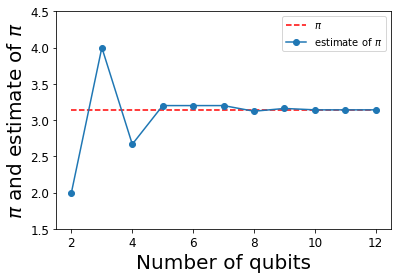

In [25]:
plotter.plot(nqs, [math.pi]*len(nqs), '--r')
plotter.plot(nqs, pi_estimates, '.-', markersize=12)
plotter.xlim([1.5, 12.5])
plotter.ylim([1.5, 4.5])
plotter.legend(['$\pi$', 'estimate of $\pi$'])
plotter.xlabel('Number of qubits', fontdict={'size':20})
plotter.ylabel('$\pi$ and estimate of $\pi$', fontdict={'size':20})
plotter.tick_params(axis='x', labelsize=12)
plotter.tick_params(axis='y', labelsize=12)
plotter.show()

We can see that more qubits there are, the more accurate the estimation is.

### Grover's Algorithm Implementation

Grover's algorithm implementation for the case of 2 qubits for $\lvert w \rangle = |11\rangle$.

In [3]:
n = 2
grover_circuit = QuantumCircuit(n)

def initialize_s(qc, qubits):
    """Apply a H-gate to 'qubits' in qc"""
    for q in qubits:
        qc.h(q)
    return qc

grover_circuit = initialize_s(grover_circuit, [0,1])

In the case $\lvert w \rangle = \lvert 11 \rangle$, the oracle $U_\omega$ acts as follows: 

$$U_\omega | s \rangle = U_\omega \frac{1}{2}\left( |00\rangle + |01\rangle + |10\rangle + |11\rangle \right) = \frac{1}{2}\left( |00\rangle + |01\rangle + |10\rangle - |11\rangle \right).$$

$$
U_\omega = 
\begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & -1 \\
\end{bmatrix}
$$

which is commonly known as the controlled-Z gate. Therefore, in this example, the controlled-Z gate serves as our oracle:

In [4]:
grover_circuit.cz(0, 1)  # Oracle

Then we need to implement the diffuser (or amplification part): $U_s = 2|s\rangle\langle s| - I$ 

We need to apply:
$$H^{\otimes n}U_0 H^{\otimes n} = U_s$$

such that
$$U_0 \frac{1}{2}\left( \lvert 00 \rangle + \lvert 01 \rangle + \lvert 10 \rangle + \lvert 11 \rangle \right) = \frac{1}{2}\left( \lvert 00 \rangle - \lvert 01 \rangle - \lvert 10 \rangle - \lvert 11 \rangle \right)$$

We obtain the following circuit:


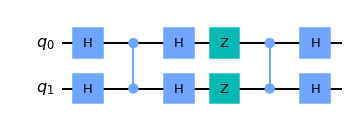

In [7]:
# Diffusion operator (U_s)
grover_circuit.h([0, 1])
grover_circuit.z([0, 1])
grover_circuit.cz(0, 1)
grover_circuit.h([0, 1])
grover_circuit.draw(output='mpl')

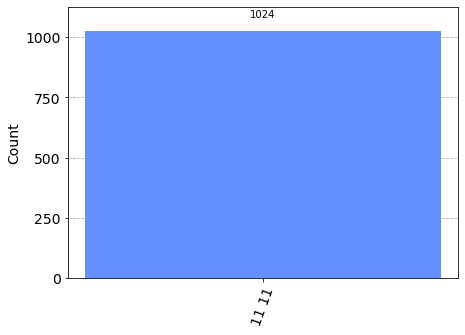

In [9]:
sim = Aer.get_backend('aer_simulator')
grover_circuit.measure_all()
qobj = assemble(grover_circuit)
counts = sim.run(qobj).result().get_counts()
plot_histogram(counts)
